In [64]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# Statistics
from sklearn.decomposition import PCA
from sklearn.feature_selection import mutual_info_classif
from sklearn.model_selection import train_test_split
plt.style.use('ggplot')

In [33]:
df = pd.read_csv("data/cleaned_data.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3622 entries, 0 to 3621
Data columns (total 35 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   age                            3622 non-null   float64
 1   sex                            3622 non-null   float64
 2   on thyroxine                   3622 non-null   float64
 3   query on thyroxine             3622 non-null   float64
 4   on antithyroid medication      3622 non-null   float64
 5   TSH measured                   3622 non-null   float64
 6   psych                          3622 non-null   float64
 7   hypopituitary                  3622 non-null   float64
 8   tumor                          3622 non-null   float64
 9   goitre                         3622 non-null   float64
 10  lithium                        3622 non-null   float64
 11  query hyperthyroid             3622 non-null   float64
 12  query hypothyroid              3622 non-null   f

<ipython-input-29-88d6dd96adb2>:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  df.hist(ax = ax, bins=50)


array([[<AxesSubplot: title={'center': 'age'}>,
        <AxesSubplot: title={'center': 'sex'}>,
        <AxesSubplot: title={'center': 'on thyroxine'}>,
        <AxesSubplot: title={'center': 'query on thyroxine'}>,
        <AxesSubplot: title={'center': 'on antithyroid medication'}>,
        <AxesSubplot: title={'center': 'TSH measured'}>],
       [<AxesSubplot: title={'center': 'psych'}>,
        <AxesSubplot: title={'center': 'hypopituitary'}>,
        <AxesSubplot: title={'center': 'tumor'}>,
        <AxesSubplot: title={'center': 'goitre'}>,
        <AxesSubplot: title={'center': 'lithium'}>,
        <AxesSubplot: title={'center': 'query hyperthyroid'}>],
       [<AxesSubplot: title={'center': 'query hypothyroid'}>,
        <AxesSubplot: title={'center': 'I131 treatment'}>,
        <AxesSubplot: title={'center': 'thyroid surgery'}>,
        <AxesSubplot: title={'center': 'pregnant'}>,
        <AxesSubplot: title={'center': 'sick'}>,
        <AxesSubplot: title={'center': 'T3 measu

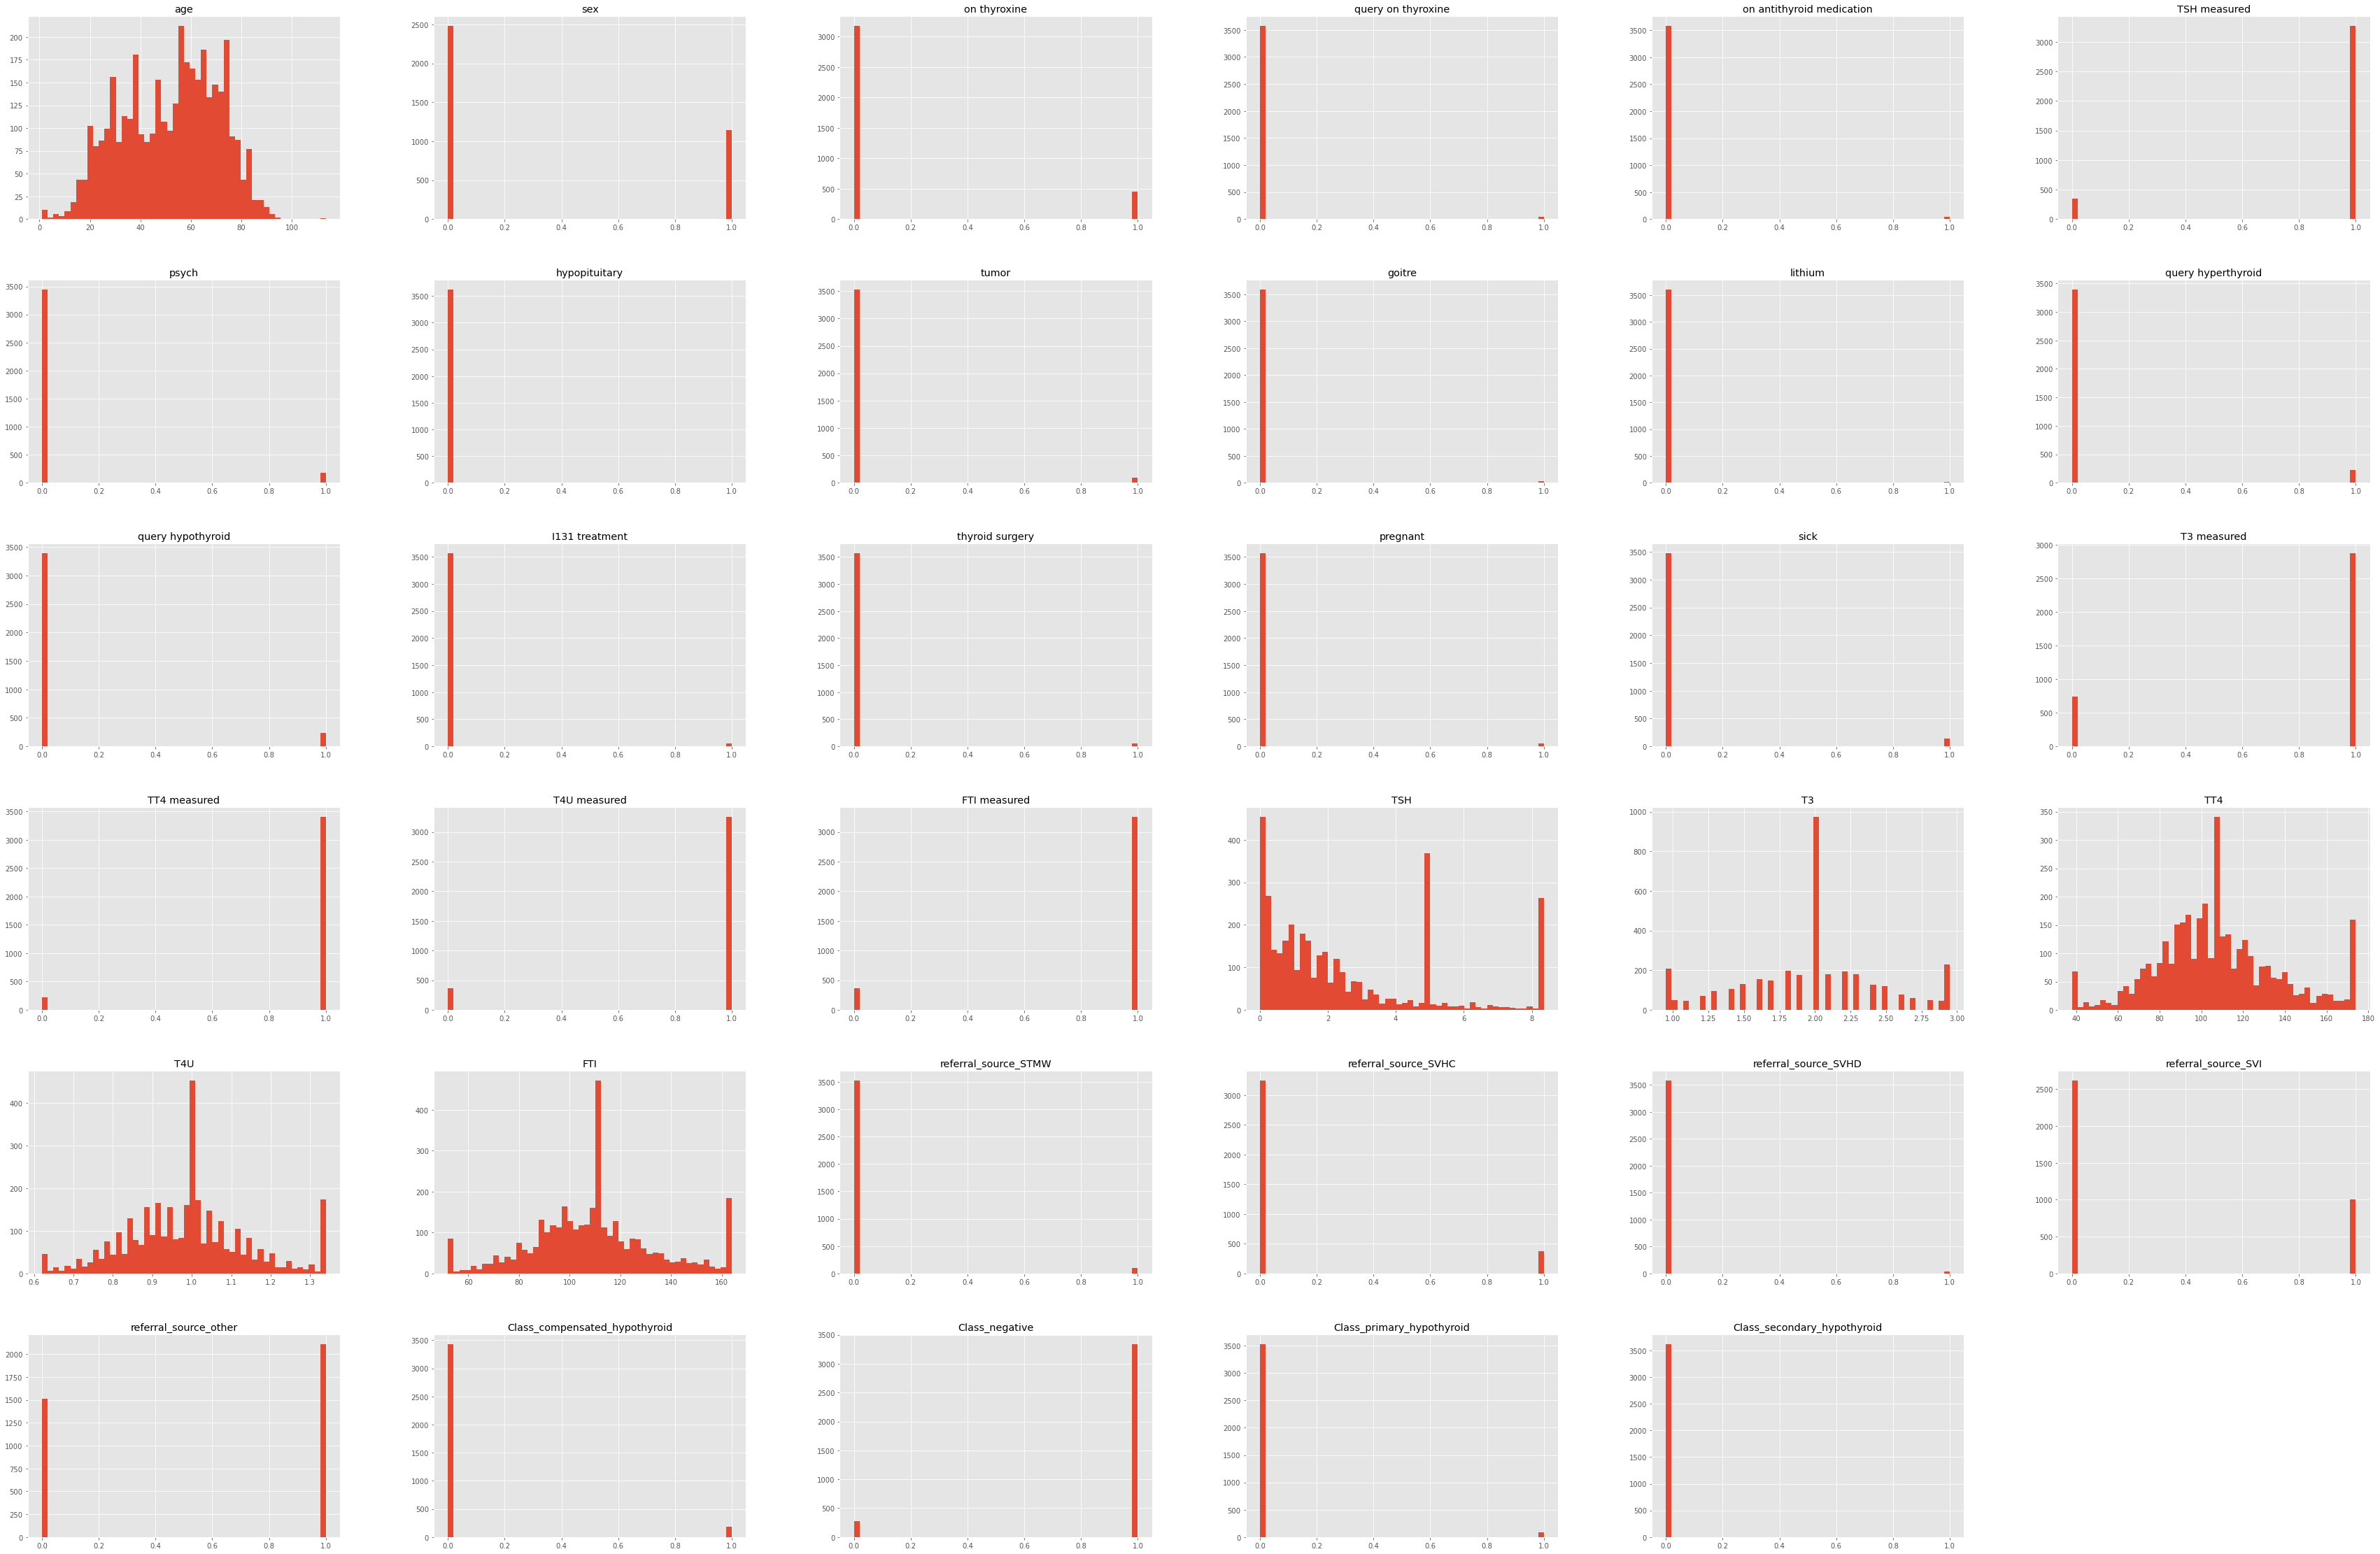

In [29]:
fig = plt.figure(figsize = (60,40))
ax = fig.gca()
df.hist(ax = ax, bins=50)

- We notice that most of continuous data follow the Normal Distribution Curve and this is an excellent thing.
- Many Binary Features are not balanced and this may result in overfitting.
- We notice that the `Class_negative` is in contract with the other 3 classes that are `Class_compensated_hypothyroid`, `Class_primary_hypothyroid`, `Class_secondary_hypothyroid`
    - thus as a **Future Step** we may combine these 3 classes vs the negative class. *Implemented in Final Work Notebook*

In [38]:
def stat_analysis(df, n):
    #-----------------------------------------------------------------------------------------
    # Check correlation
    corr = df.corr()

    # Set up the matplotlib plot configuration
    plt.figure(figsize=(40,38))

    plt.subplot(2,1,1)

    # Generate a mask for upper triangle
    mask = np.triu(np.ones_like(corr, dtype=bool))

    # Configure a custom diverging colormap
    cmap = sns.diverging_palette(230, 20, as_cmap=True)

    # Draw the heatmap
    plt.title('Correlation')
    sns.heatmap(corr, annot=True, mask = mask, cmap=cmap)


    #-----------------------------------------------------------------------------------------
    # Perform PCA to make dimensionality reduction
    pca = PCA()

    # Fit the standardized data to the pca
    pca=pca.fit(df)

    # Plot the proportion of variance explained on the y-axis of the bar plot
    # Set up the matplotlib plot configuration
    plt.subplot(2,1,2)
    plt.title('PCA')
    plt.bar(range(1, pca.n_components_ + 1),  pca.explained_variance_ratio_)
    plt.xlabel('Principal component #')
    plt.ylabel('Proportion of variance explained')
    plt.xticks(range(df.shape[1]))

    two_first_comp_var_exp = pca.explained_variance_ratio_.cumsum()[n]
    print("The cumulative variance of the first several principal components is {}".format(
    round(two_first_comp_var_exp, 5)))

The cumulative variance of the first several principal components is 0.99955


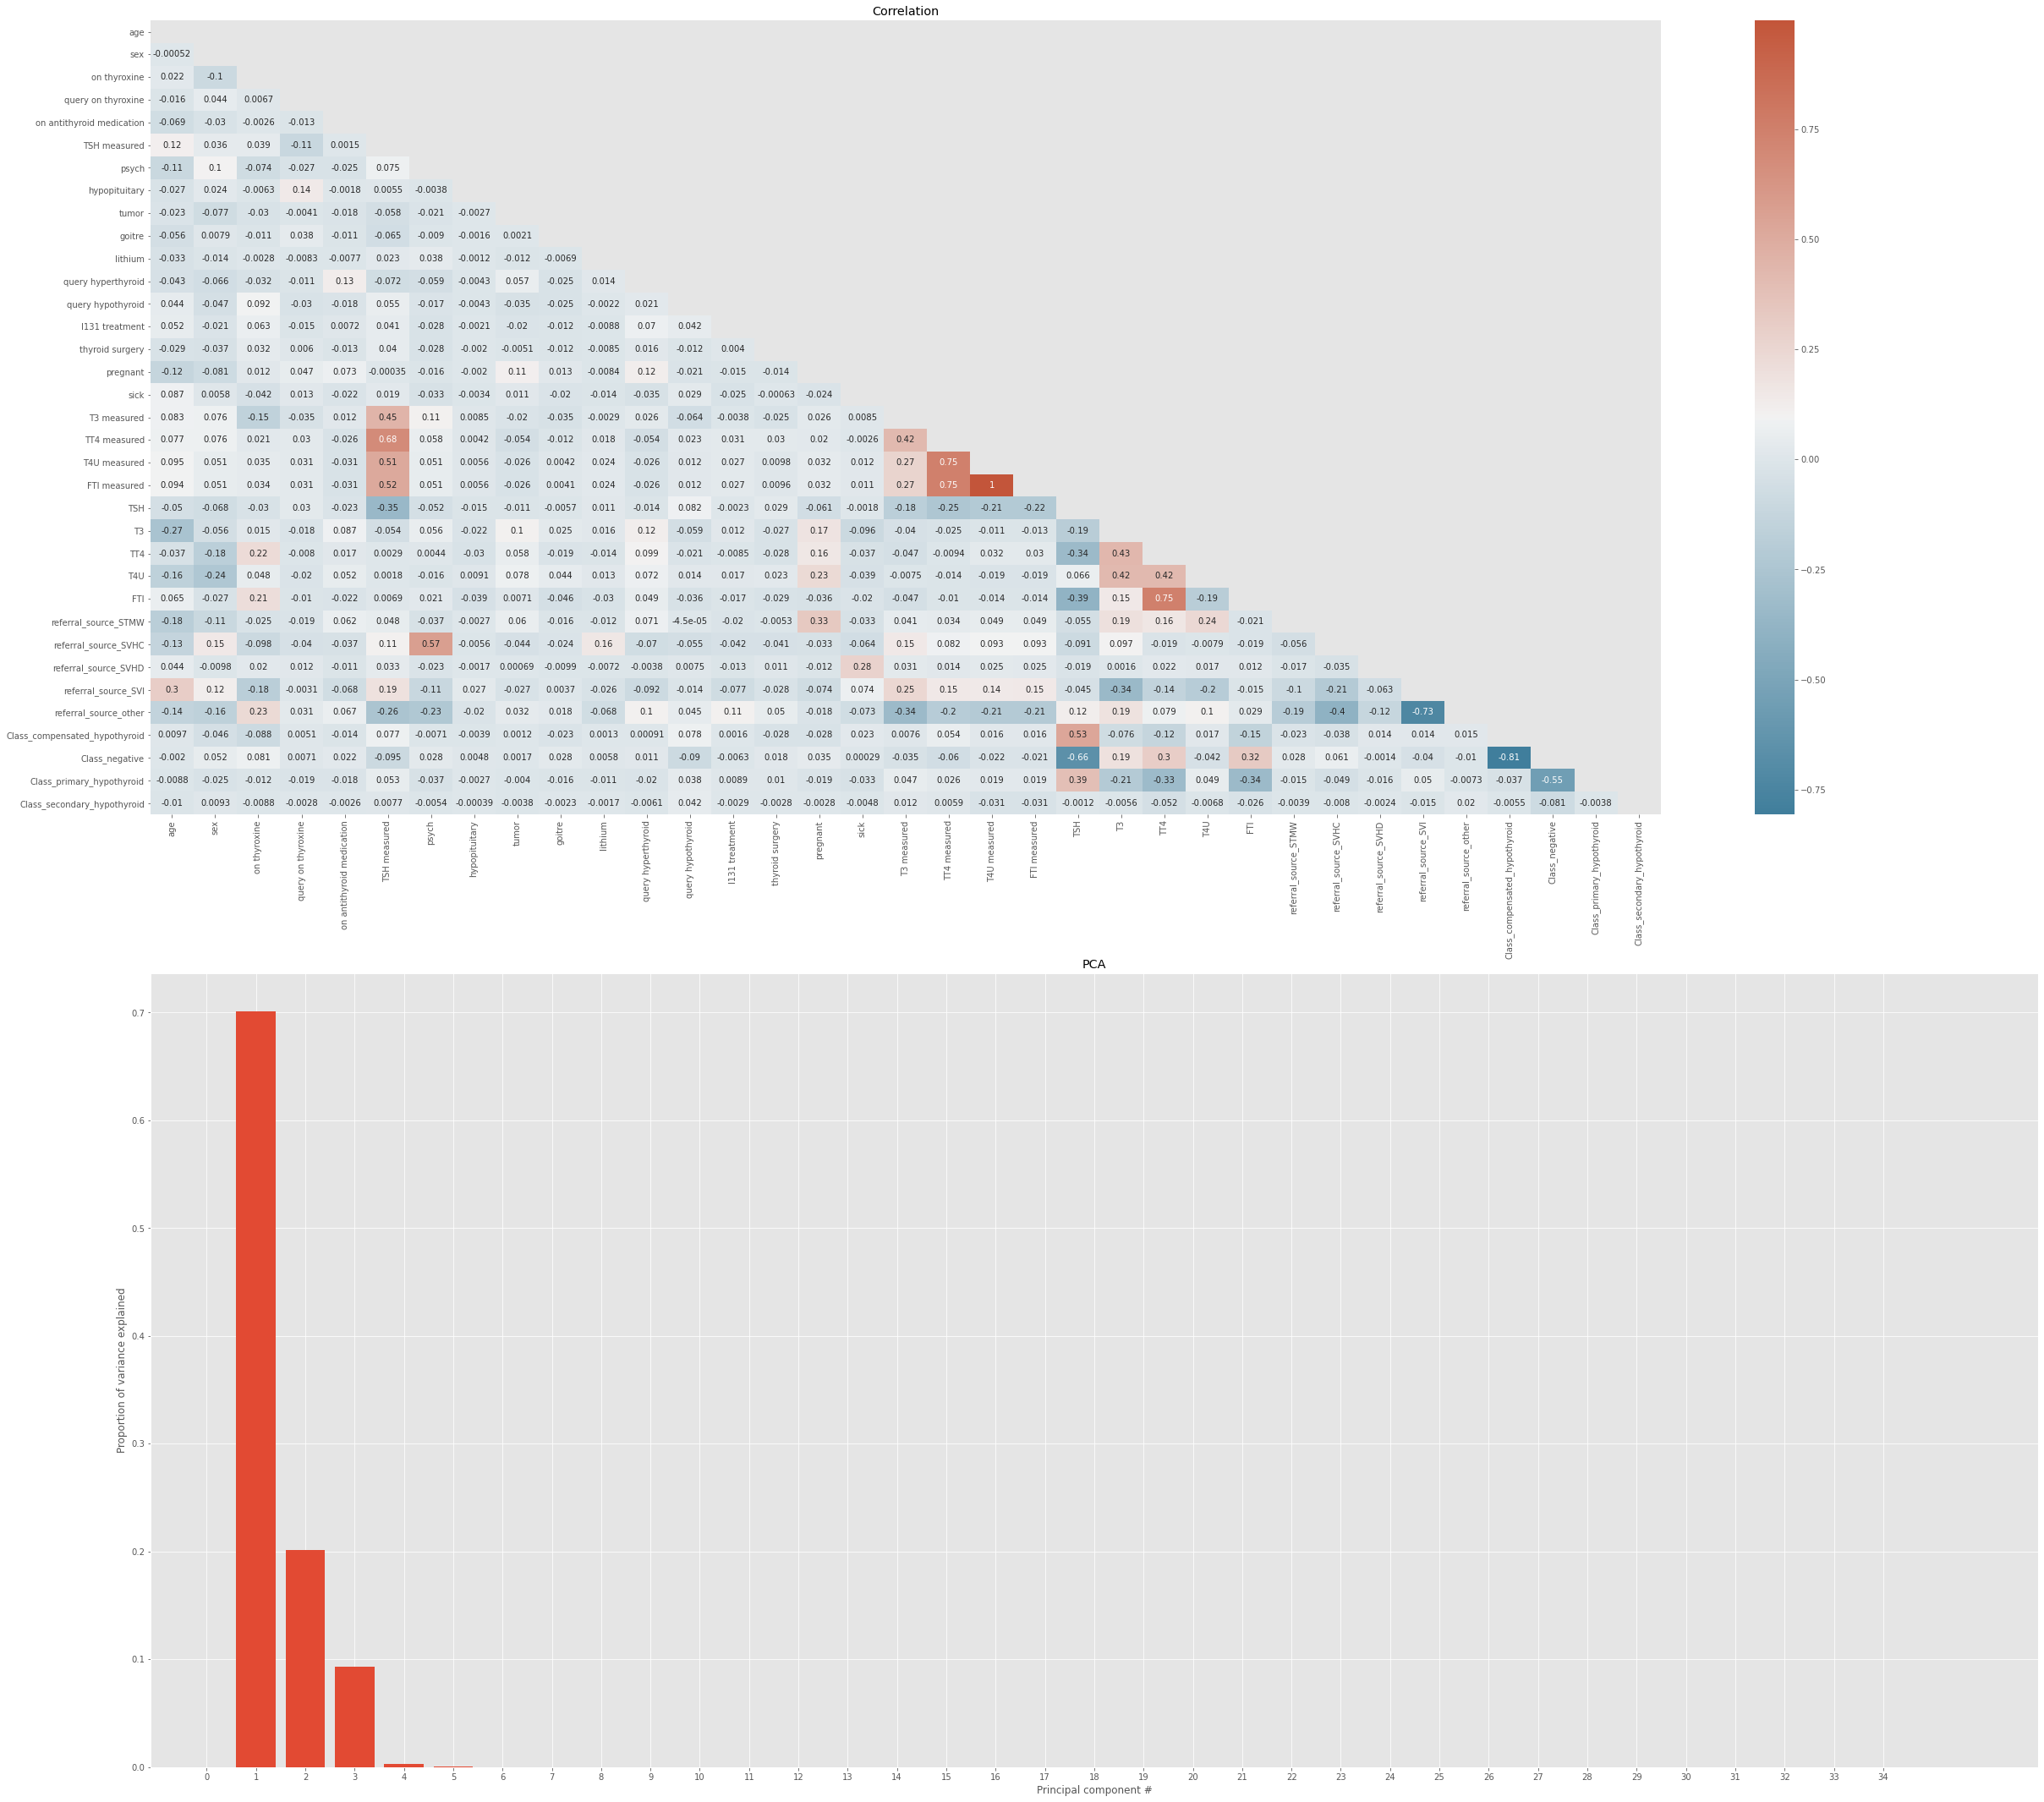

In [39]:
stat_analysis(df, 7)

We observe that:
- Correlation Coefficients are low and we may apply feature selection.
- We can apply PCA for better results, but this is an advanced step with respect to the requirements of our assignment. *Implemented in Final Work Notebook*

In [51]:
def mutual_info_relative_to(class_name):
    # Select best features
    X_train_feat, _, y_train_feat ,_ = train_test_split(df.drop(labels=[class_name], axis=1),
        df[class_name],
        test_size=0.3,
        random_state=0)

    mutual_info = mutual_info_classif(X_train_feat, y_train_feat)
    mutual_info = pd.Series(mutual_info)
    mutual_info.index = X_train_feat.columns
    mutual_info.sort_values(ascending=False).plot.bar(figsize=(20, 8))
    plt.title(f"Mutual Information Related to: {class_name}")
    plt.show()

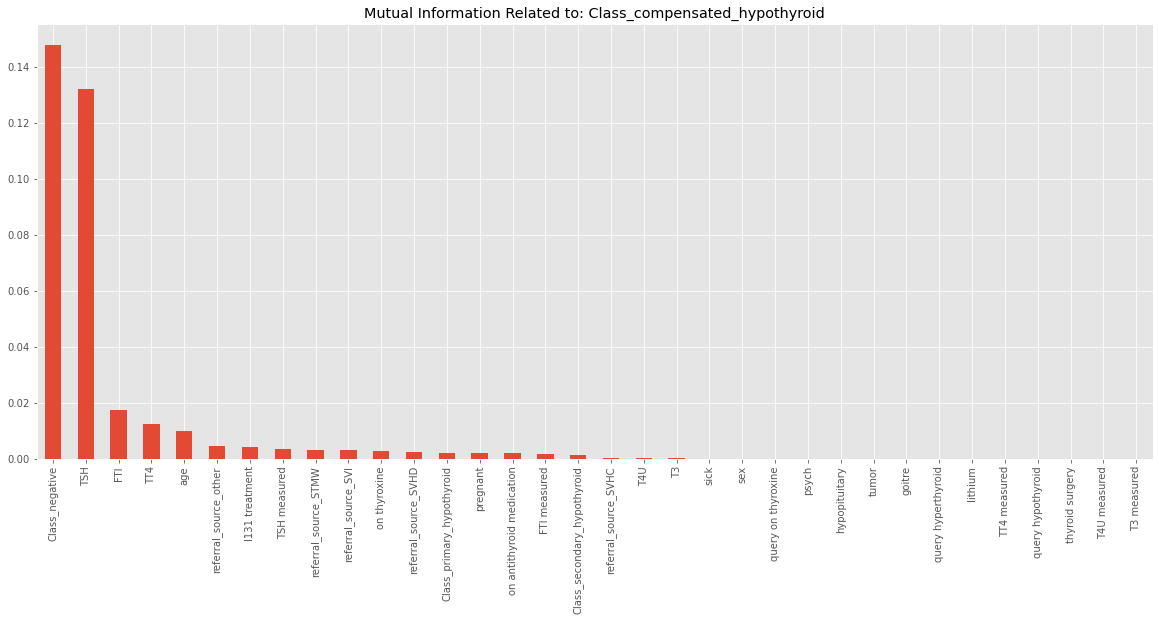

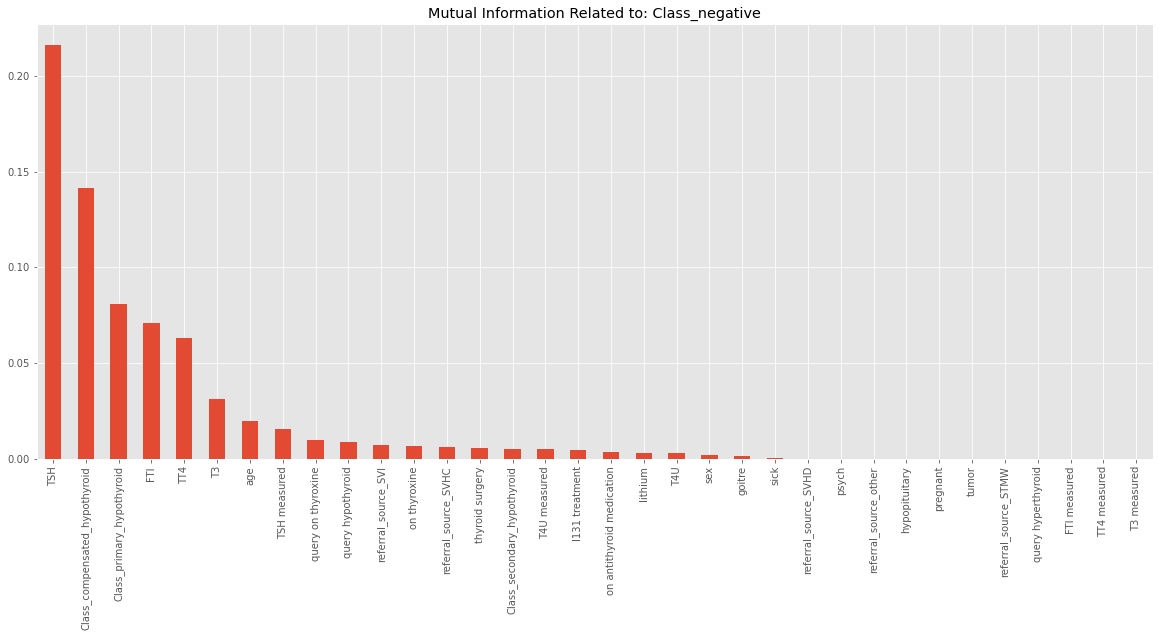

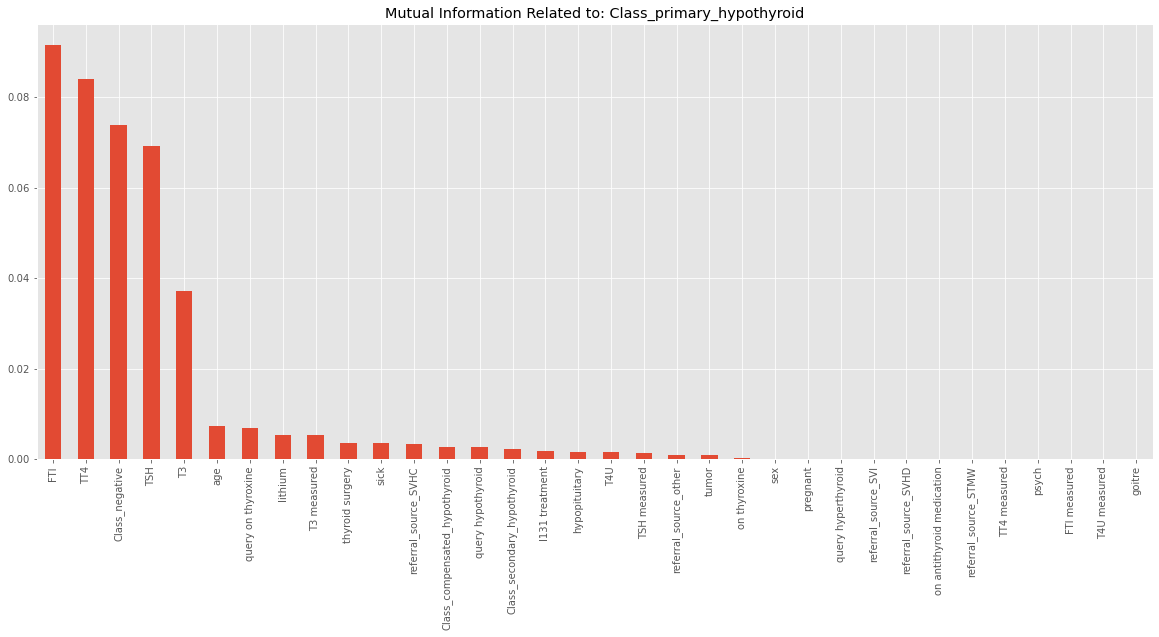

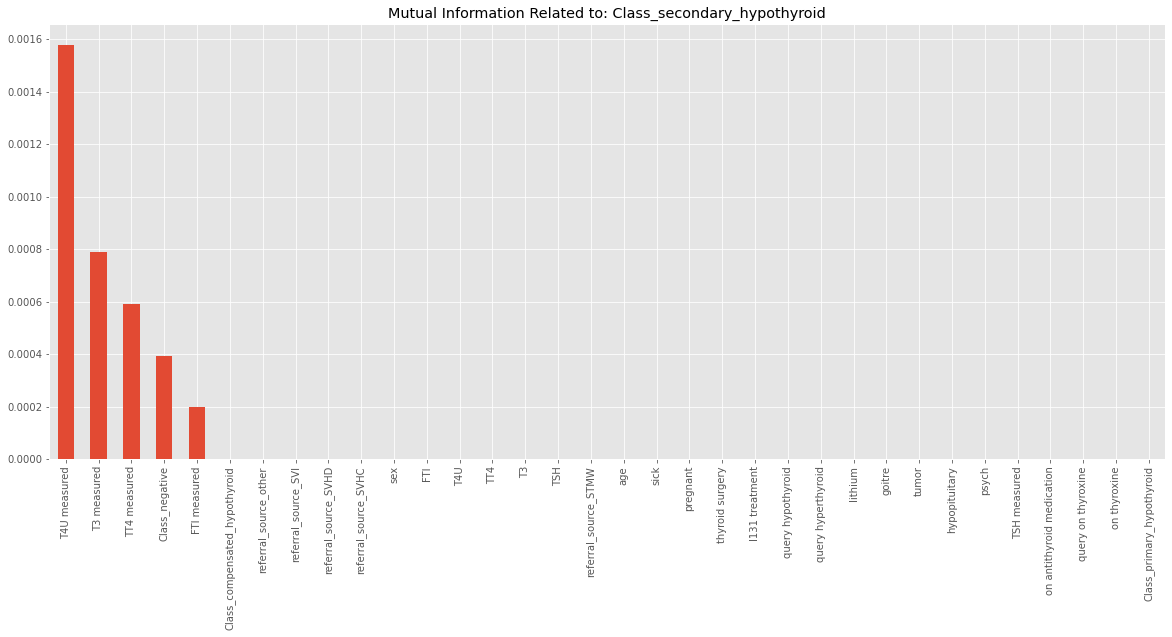

In [52]:
classes = ["Class_compensated_hypothyroid", "Class_negative", "Class_primary_hypothyroid", "Class_secondary_hypothyroid"]

for class_name in classes:
    mutual_info_relative_to(class_name)

In [63]:
data = {'Class_secondary_hypothyroid': ["T4U measured", "T3 measured", "TT4 measured", "Class_negative", "FTI measured"],
 'Class_primary_hypothyroid': ["FTI", "TT4", "Class_negative", "TSH", "T3"],
 'Class_compensated_hypothyroid': ["FTI", "TT4", "Class_negative", "TSH", "T3"],
 'Class_negative': ["FTI", "TT4", "TSH", "Class_primary_hypothyroid", "Class_compensated_hypothyroid"] }

(pd.DataFrame(data)).to_csv("data/selected_feats.csv", index=False)